In [1]:
# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [3]:
# Step 2: Load the Dataset
data = pd.read_csv('/kaggle/input/heart-disease-detection/dataset.csv')  # update path if needed
data.head()


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
# Step 3: Data Info & Cleanup
print("Shape:", data.shape)
print("Missing values:\n", data.isnull().sum())
data.info()


Shape: (1190, 12)
Missing values:
 age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int

In [6]:
# Step 4: Feature Description Mapping (optional for readability)
data.columns = [
    'age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol',
    'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_angina',
    'oldpeak', 'st_slope', 'target'
]


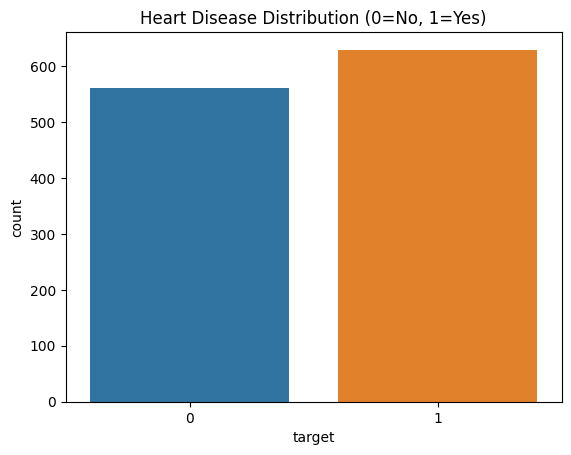

In [7]:
# Step 5: Exploratory Analysis
sns.countplot(x='target', data=data)
plt.title("Heart Disease Distribution (0=No, 1=Yes)")
plt.show()


In [9]:
# Step 6: Preprocessing
X = data.drop('target', axis=1)
y = data['target']

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
# Step 7: Train Models

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)



Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       112
           1       0.84      0.86      0.85       126

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238



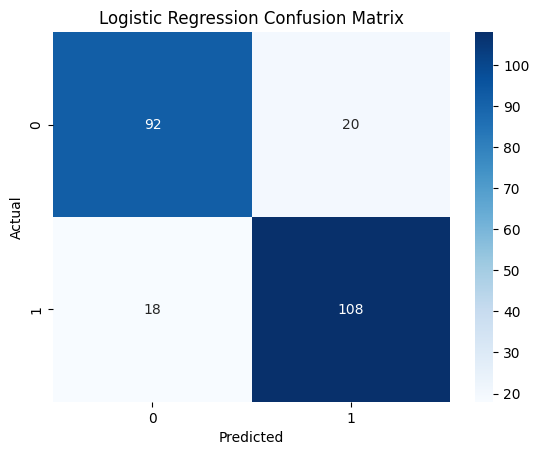


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       112
           1       0.93      0.94      0.93       126

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238



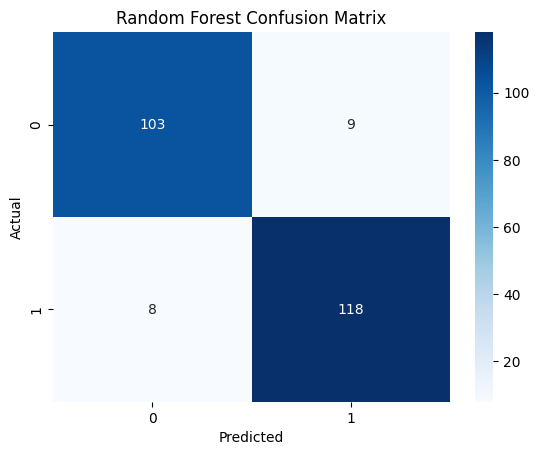

In [11]:
# Step 8: Evaluation

def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate_model("Logistic Regression", y_test, logreg_preds)
evaluate_model("Random Forest", y_test, rf_preds)


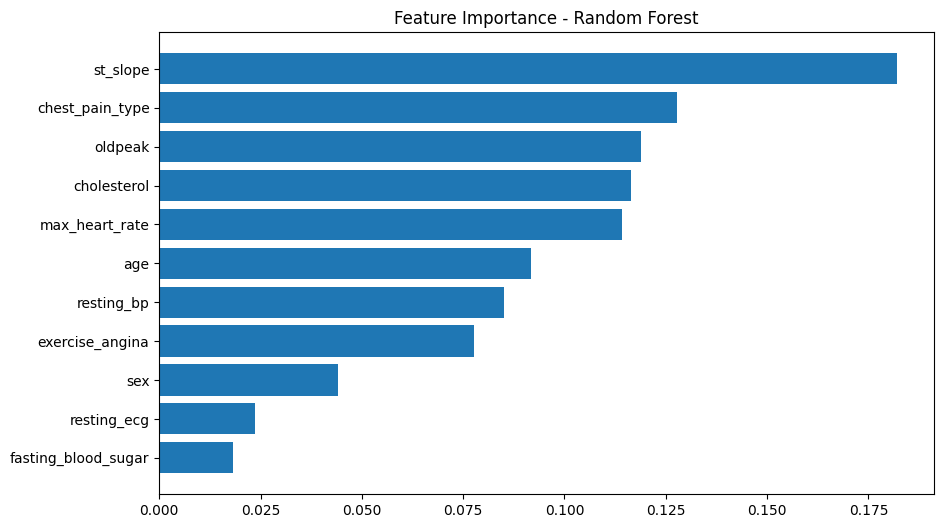

In [12]:
# Step 9: Feature Importance (for Random Forest)
feature_names = data.columns[:-1]
importances = rf.feature_importances_
sorted_idx = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.title("Feature Importance - Random Forest")
plt.show()


In [13]:
new_patient = {
    'age': 52,
    'sex': 1,  # male
    'chest_pain_type': 3,  # non-anginal pain
    'resting_bp': 130,
    'cholesterol': 250,
    'fasting_blood_sugar': 0,  # sugar < 120
    'resting_ecg': 1,  # ST-T wave abnormality
    'max_heart_rate': 150,
    'exercise_angina': 0,
    'oldpeak': 1.0,
    'st_slope': 2  # flat
}


In [14]:
# Step 1: Convert to DataFrame
input_df = pd.DataFrame([new_patient])

# Step 2: Scale it using the same scaler used on training data
input_scaled = scaler.transform(input_df)  # 'scaler' from training cell

# Step 3: Predict using your trained model (Random Forest or Logistic Regression)
pred = rf.predict(input_scaled)  # or logreg.predict(input_scaled)

# Step 4: Display Result
if pred[0] == 1:
    print("⚠️ Prediction: Heart Disease Detected")
else:
    print("✅ Prediction: No Heart Disease Detected")


✅ Prediction: No Heart Disease Detected


In [15]:
prob = rf.predict_proba(input_scaled)[0][1]  # Probability of class 1 (disease)
print(f"Probability of Heart Disease: {prob*100:.2f}%")


Probability of Heart Disease: 46.00%
